<a href="https://colab.research.google.com/github/vlad-danaila/machine-learning-workout/blob/master/Pytorch_Workout_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Style Transfer**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install torch torchvision

In [0]:
import torch as t
import torchvision as tv
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt

**Load Content & Style Images**

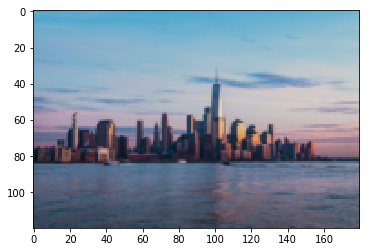

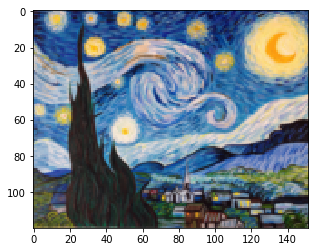

In [223]:
normalize_params = .5, .5, .5

img_transform = tv.transforms.Compose([
  tv.transforms.Resize(120),
  tv.transforms.ToTensor(),
  tv.transforms.Normalize(normalize_params, normalize_params)                                       
])

def to_numpy(img):
  return img.clone().cpu().detach().numpy()

def load_image(path):
  img = pil.Image.open(path)
  img = img_transform(img)
  return img

def plot_img(img):
  img = to_numpy(img)
  img = img.transpose(1, 2, 0)
  img = img * np.array(normalize_params) + np.array(normalize_params)
  plt.imshow(img)
  plt.show()

img_content = load_image('/content/drive/My Drive/city.jpg')
img_content = img_content.cuda()
plot_img(img_content)

img_style = load_image('/content/drive/My Drive/starry_night.jpg')
img_style = img_style.cuda()
plot_img(img_style)

img_target = img_content.clone().requires_grad_(True)

**Define Model**

In [0]:
model = tv.models.vgg19(pretrained = True)
model = model.cuda()
for param in model.parameters():
  param.requires_grad = False

**Loss**

In [0]:
def extract_feats(img, selected_layers):
  img = img.unsqueeze(0)
  feats = []
  for i in range(selected_layers[-1] + 1):
    img = model.features[i](img)
    if i in selected_layers:
      feats.append(img.clone())
  return feats

def gram(x):
  x = x.view(x.shape[1], -1)
  gram = t.mm(x, x.t())
  return gram

In [0]:
conv_1_1, weight_conv_1_1 = 0, 1.
conv_2_1, weight_conv_2_1 = 5, 0.75 
conv_3_1, weight_conv_3_1 = 10, 0.2 
conv_4_1, weight_conv_4_1 = 19, 0.2
conv_4_2, weight_conv_4_2 = 21, 0  # content
conv_5_1, weight_conv_5_1 = 28, 0.2

weight_content = 1
weight_style = 1e6

selected_layers = [conv_1_1, conv_2_1, conv_3_1, conv_4_1, conv_4_2, conv_5_1]
weights_per_layer = [weight_conv_1_1, weight_conv_2_1, weight_conv_3_1, weight_conv_4_1, weight_conv_4_2, weight_conv_5_1]

In [0]:
feats_content = extract_feats(img_content, [conv_4_2])
feats_style = extract_feats(img_style, selected_layers)
style_grams = [gram(x) for x in feats_style]

Step 0
Style loss 831.5624389648438
Style loss weighted 831562432.0
Content loss 0.0
Content loss weighted 0.0


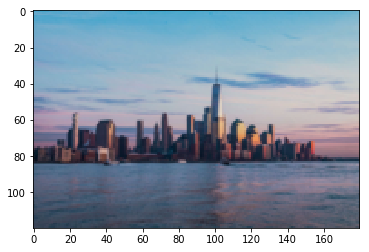

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 1000
Style loss 7.494146347045898
Style loss weighted 7494146.5
Content loss 89.34456634521484
Content loss weighted 89.34456634521484


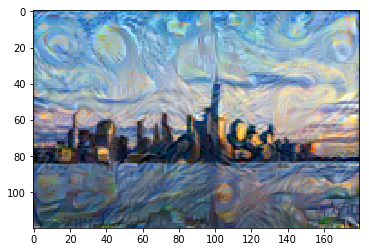

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 2000
Style loss 4.685425758361816
Style loss weighted 4685426.0
Content loss 93.63801574707031
Content loss weighted 93.63801574707031


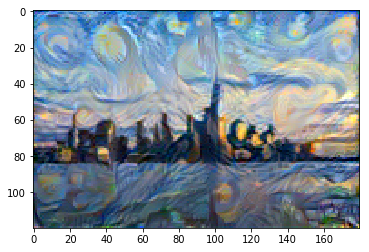

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 3000
Style loss 3.513436794281006
Style loss weighted 3513436.75
Content loss 95.6122055053711
Content loss weighted 95.6122055053711


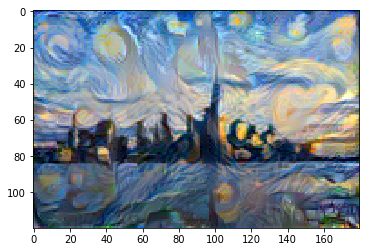

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 4000
Style loss 2.84218692779541
Style loss weighted 2842187.0
Content loss 97.00047302246094
Content loss weighted 97.00047302246094


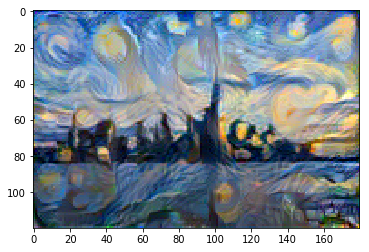

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 5000
Style loss 2.4658448696136475
Style loss weighted 2465844.75
Content loss 97.95067596435547
Content loss weighted 97.95067596435547


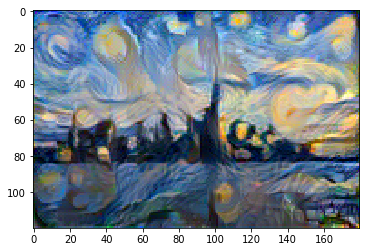

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 6000
Style loss 2.2406582832336426
Style loss weighted 2240658.25
Content loss 98.87615203857422
Content loss weighted 98.87615203857422


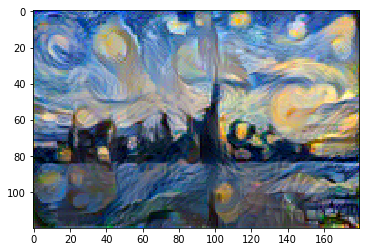

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 7000
Style loss 2.1260523796081543
Style loss weighted 2126052.5
Content loss 99.19755554199219
Content loss weighted 99.19755554199219


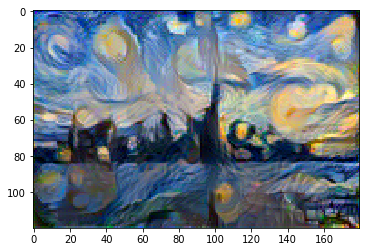

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 8000
Style loss 2.0171427726745605
Style loss weighted 2017142.75
Content loss 99.82815551757812
Content loss weighted 99.82815551757812


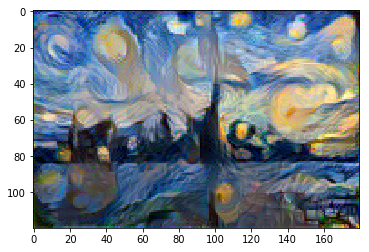

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 9000
Style loss 1.9531928300857544
Style loss weighted 1953192.875
Content loss 100.21724700927734
Content loss weighted 100.21724700927734


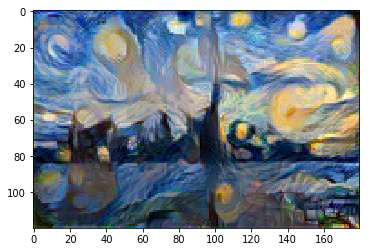

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 10000
Style loss 1.9086982011795044
Style loss weighted 1908698.25
Content loss 100.02272033691406
Content loss weighted 100.02272033691406


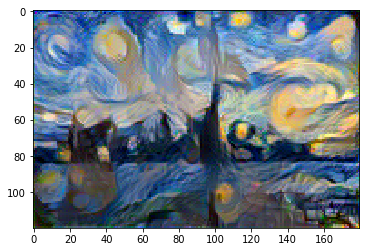

In [228]:
steps = 10_000
display_step = 1000
optimizer = t.optim.Adam([img_target], lr = 0.003)

for step in range(steps + 1):
  feats_target = extract_feats(img_target, selected_layers)
  loss_content = t.mean((feats_content[0] - feats_target[4]) ** 2)
  loss_style = t.tensor(0.).cuda()
  for i in range(len(selected_layers)): 
    target_gram = gram(feats_target[i])
    _, c, w, h = feats_target[i].shape
    loss_style += weights_per_layer[i] * t.mean((target_gram - style_grams[i]) ** 2) / (c * w * h) 
  total_loss = weight_content * loss_content + weight_style * loss_style
  loss_style.backward()
  optimizer.step()
  optimizer.zero_grad()
  if step % display_step == 0:
    print('Step', step)
    print('Style loss', loss_style.item())
    print('Style loss weighted', (weight_style * loss_style).item())
    print('Content loss', loss_content.item())
    print('Content loss weighted', (weight_content * loss_content).item())
    plot_img(img_target)  